#  (MAS473) Introduction to Artificial Intelligence with Mathematics
# Homework #5: Principal Component Analysis

TA : Wonyeong Song, lcre47@kaist.ac.kr

Due Date : Dec 10(Sun) 23:59

In HW5, you should submit following file:
- `hw5_StudentID.ipynb`: a **completed** version of this IPython notebook.
  - **Do NOT clear** your outputs (ex. plots, outputs, etc.).  

First of all, you should copy the original Colab notebook into your Google drive.
  - Sign in Google.
  - Click `File` in the left top on menu and select `Save a copy in Drive..`.
- Then you can edit your copied notebook in Google Colab!
  - Fill in the `Edit here` marked part to run appropriately.
  - Each code cell will be executed when you click the play button left side of the cell (or press `Ctrl+Enter`).
- Download your copied notebook file (`.ipynb` file) to your local and rename it as the following:

**Please submit the notebook file (without compressing) with the name like below:**

**hw5_StudentID.ipynb**

**ex) hw5_20191234.ipynb**

---

# 0. Prerequisites

This homework uses **NumPy** and **sklearn.decomposition.PCA**.
If you are not familiar with them, please read documents below.

**NumPy**

https://numpy.org/doc/stable/

**sklearn.decomposition.PCA**

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

Also, we will use MNIST dataset in this homework.

#HW 1. Embedding on principal subspace

In this problem, we will reproduce **Figure 10.1** of [our textbook](https://mml-book.github.io/).

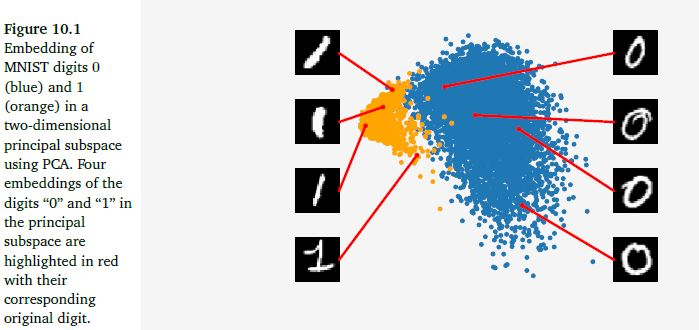

The figure shows embedding of MNIST digits 0 and 1 in a two-dimensional principal subspace. In this problem, you should **reproduce this figure with other two digits**(e.g. (1,8)). To do this, we first bring MNIST dataset first.

In [2]:
import numpy as np
import ssl
from sklearn.datasets import fetch_openml
ssl._create_default_https_context = ssl._create_unverified_context
mnist = fetch_openml('mnist_784', version=1)

X=mnist.data
y=np.array(mnist.target)

C:\Users\kyuju\AppData\Roaming\Python\Python38\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Now, find first two principal component and [transform data into principal space](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.fit_transform).

In [3]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)

pca.fit(X)

X_pca=pca.transform(X)

Now, **your task is to plot scatter plot similar to** **Figure 10.1**. You don't need to highlight some embeddings with their corresponding original digit: just scatter plot is OK.



When you draw scatter plot, please refer [following document](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) or other homeworks that uses scatter plot(e.g. HW4).

**Try at least 3 pairs of digits.**(e.g. (1,8), (5,9), (3,6))

(70000, 2)


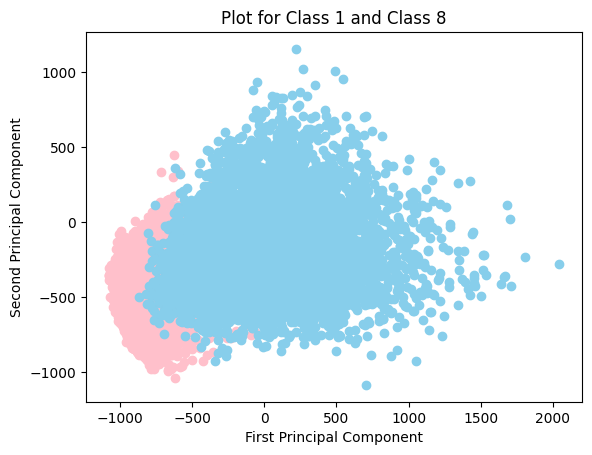

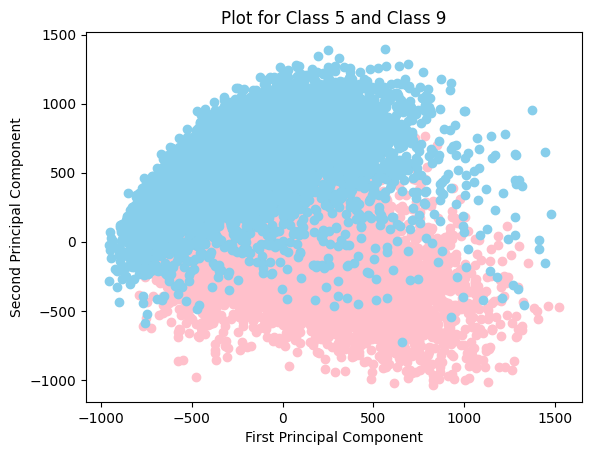

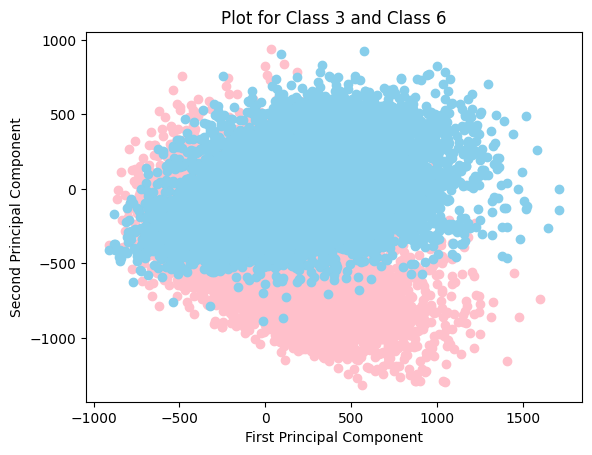

In [4]:
import matplotlib.pyplot as plt
print(X_pca.shape)
#Implement here
#---------
def getClassData(X, y, c):
    c_str = str(c)
    index_c = np.where(y == c_str)[0]
    X_c = X_pca[index_c]
    return X_c
            
def plotPair(X, y, c1, c2):
    X_c1 = getClassData(X, y, c1)
    X_c2 = getClassData(X, y, c2)
    plt.figure()
    plt.scatter(X_c1[:, 0], X_c1[:, 1], c='pink')
    plt.scatter(X_c2[:, 0], X_c2[:, 1], c='skyblue')

    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title(f'Plot for Class {c1} and Class {c2}')
    plt.show()

plotPair(X_pca, y, 1, 8)
plotPair(X_pca, y, 5, 9)
plotPair(X_pca, y, 3, 6)
#---------
#Implement here

#HW 2. Probabilistic PCA

In this problem you will run a **PPCA(Probabilistic PCA)** to generate new digit.

PPCA assumes a continuous latent variable $\mathbf{z}\in \mathbb{R}^M$ with a standard-normal prior $p(\mathbf{z})=\mathcal{N}(\mathbf{0},\mathbf{I})$. And then it assumes a linear relationship between the latent variables and the observed $\mathbf{x}$ data where

$\mathbf{x}=\mathbf{B}\mathbf{z}+\boldsymbol{\mu}+\boldsymbol{\epsilon}\in \mathbb{R}^D$

where $\boldsymbol{\epsilon}\sim \mathcal{N}(\mathbf{0},\sigma^2\mathbf{I})$ is Gaussian observation noise and $\mathbf{B},\boldsymbol{\mu}$ describe the linear/affine mapping from latent to observed variables.

We first choose digit that we want to generate, then apply PCA first.


In [5]:
from sklearn.preprocessing import StandardScaler

#Select digit, then collect all data corresponds to that digit
ind=np.where(y=='0') #try different digits
X_ind=np.squeeze(np.array(X)[ind,:]) #data for selected digit

#Standardization
scaler=StandardScaler()
scaler.fit(X_ind)
X1=scaler.transform(X_ind)

#PCA
pca1=PCA(n_components=784)
pca1.fit(X1)

PCA(n_components=784)

Now, your task is to **complete the code** for PPCA. In other words, you should find ML estimators of $\boldsymbol{\mu}, \sigma^2$ and $\mathbf{B}$ from given data.


To solve this problem, you may need following attributes of *sklearn.decomposition.PCA*:

**components_** : Return principal components(eigenvector).

**explained_variance_** : Return amount of variance explained by each principal components(eigenvalues).

In [10]:
#Choose number of principal components
k = 50 #try different k
d = 784

eigenvec = pca1.components_.transpose()
eigenval = pca1.explained_variance_

# By direct eigen decomposition
mu_ml = np.mean(X1, axis=0)
X1_mean0 = X1 - mu_ml
S = (X1_mean0.T @ X1_mean0) / (X1.shape[0] - 1)

eigenvalues, eigenvectors = np.linalg.eigh(S)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# test = np.dot(S, eigenvectors[:,0]) - np.dot(eigenvalues[0], eigenvectors[:,0])
# print(np.linalg.norm(test))

# ML estimator
def ml_estimator(k, d):
    mu_ml = np.mean(X1, axis=0)

    sigma2_ml = np.mean(eigenval[k:d])  # Variance last d-k components

    comp = np.diag(np.sqrt(eigenval[:k] - np.full((k,), sigma2_ml)))

    B_ml = np.dot(eigenvec[:, :k], comp)
    return sigma2_ml, comp, B_ml

Now, choose any latent vector and generate new data. Try various $k$, number of principal components, and observe what happens. Discuss about **relation between $k$ and generated image**. **Try at least 3 different choice** of $k$.

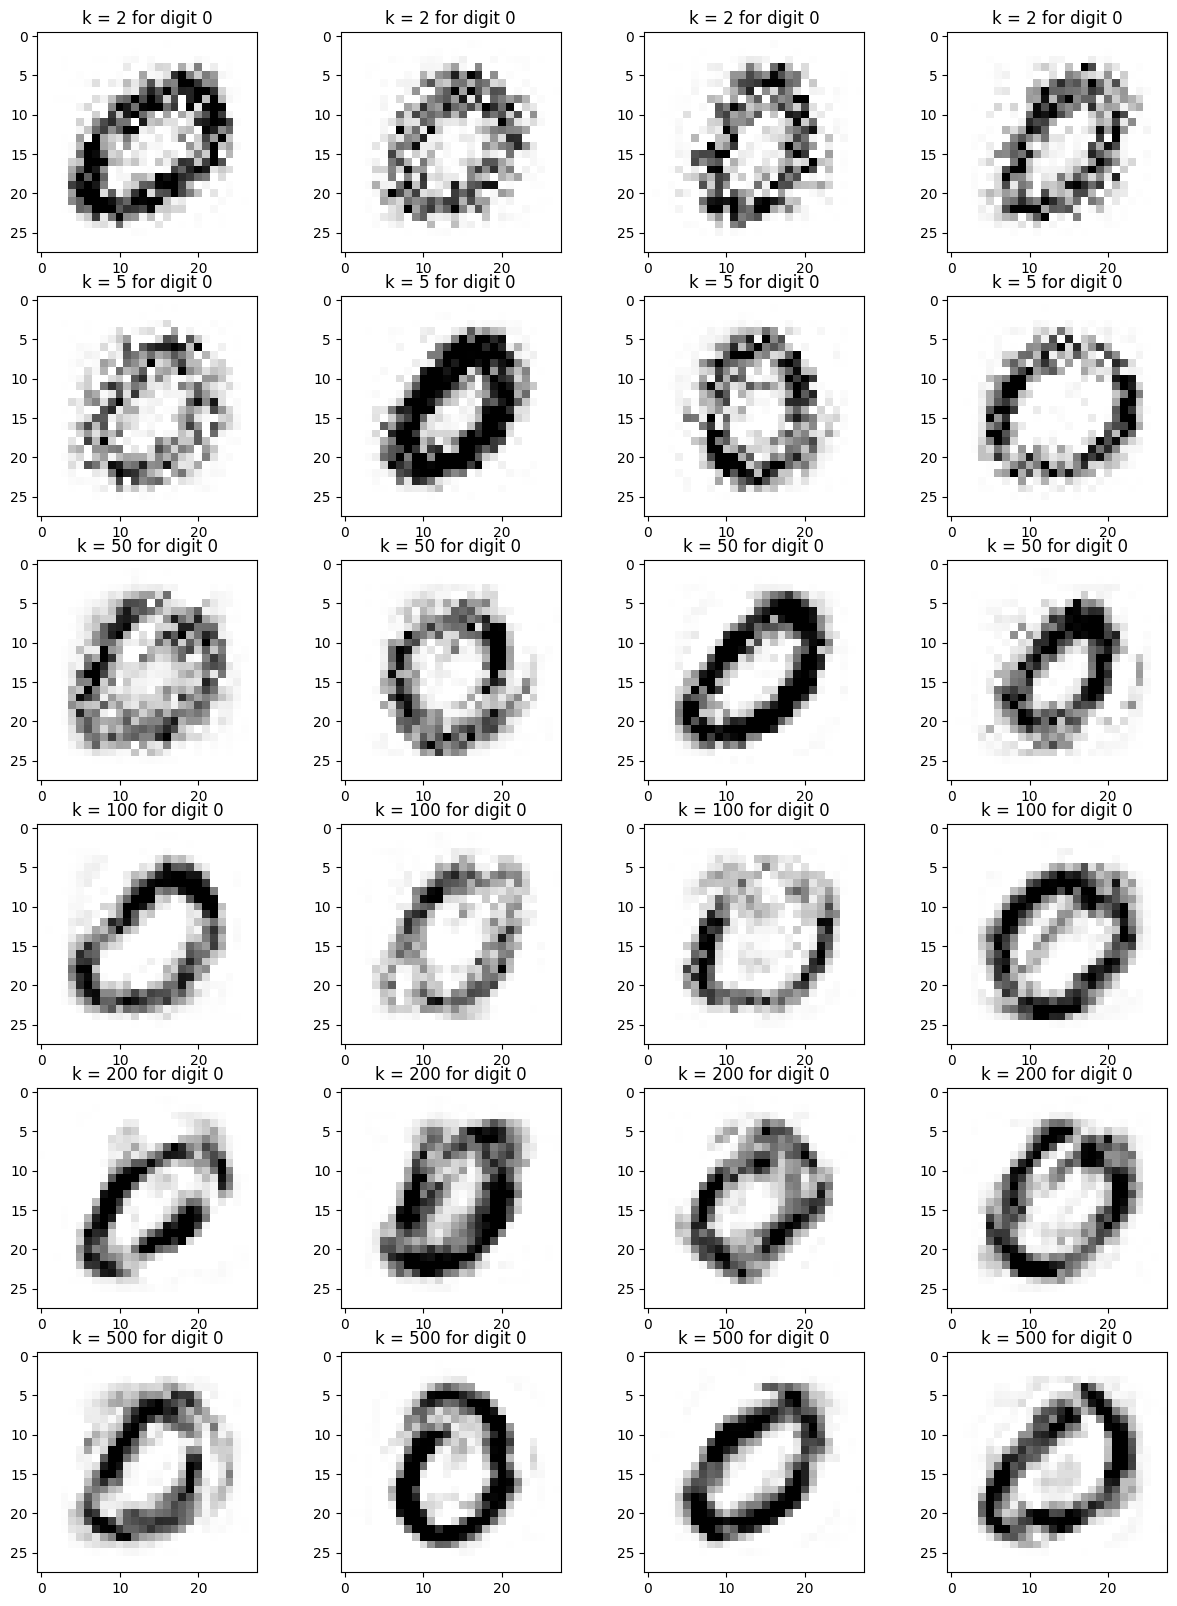

In [11]:
k = 50
d = 784
k_list = [2, 5, 50, 100, 200, 500]

reps = 4
k_len = len(k_list)
fig, axs = plt.subplots(k_len, reps, figsize=(15, 20))

def draw_fig(k, i, j):
    sigma2_ml, comp, B_ml = ml_estimator(k, d)
    #random latent vector
    z=np.random.normal(size=k)

    #use latent vector to generate new data
    x_temp=np.matmul(B_ml,z)+mu_ml+np.sqrt(sigma2_ml)*np.random.normal(size=784)

    #Undo standardization
    x_ppca=np.sqrt(scaler.var_)*x_temp+scaler.mean_
    axs[i][j]
    axs[i][j].set_title(f'k = {k} for digit 0')
    
    #Plot the digit
    axs[i][j].imshow(np.array(x_ppca).reshape(28,28), cmap='Greys', vmin=0, vmax=255, interpolation='nearest')


for i in range(k_len):
    k = k_list[i]
    for j in range(reps):
        draw_fig(k, i, j)

We can notice that the image gets cleaner as $k$ increase. However, due to the limitation of linear model, the drawing is not perfect even if we use large $k$.